In [ ]:
from google.colab import files
uploaded = files.upload()


Saving V_1.mp4 to V_1.mp4


In [ ]:
import cv2
import os


video_path = '/content/V_1.mp4'
extract_path = '/content/extracted_frames/'


os.makedirs(extract_path, exist_ok=True)

cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_name = f'frame_{frame_count}.jpg'
    frame_path = os.path.join(extract_path, frame_name)
    cv2.imwrite(frame_path, frame)
    frame_count += 1

cap.release()
print(f"Extracted {frame_count} frames.")


Extracted 103 frames.


In [ ]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

extracted_frames_path = '/content/extracted_frames/'

image_size = (64, 64)

images = []
labels = []

for i in range(103):
    frame_path = os.path.join(extracted_frames_path, f'frame_{i}.jpg')
    if os.path.exists(frame_path):
        img = cv2.imread(frame_path)
        img = cv2.resize(img, image_size)
        img = img / 255.0
        images.append(img)


        if i % 2 == 0:
            labels.append(0)
        else:
            labels.append(1)

images = np.array(images)
labels = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=8)

loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.5351 - loss: 1.1208 - val_accuracy: 0.6190 - val_loss: 0.6899
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5340 - loss: 0.6963 - val_accuracy: 0.3810 - val_loss: 0.7046
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5035 - loss: 0.6941 - val_accuracy: 0.3810 - val_loss: 0.7232
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.4894 - loss: 0.6995 - val_accuracy: 0.3810 - val_loss: 0.7060
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5660 - loss: 0.6889 - val_accuracy: 0.3810 - val_loss: 0.7085
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5513 - loss: 0.6903 - val_accuracy: 0.3810 - val_loss: 0.7147
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4792 - loss: 0.6989 - val_accuracy: 0.3810 - val_loss: 0.7198
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5424 - loss: 0.6904 - val_accuracy: 0.3810 - val_loss: 0.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

import numpy as np
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)

class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

history = model.fit(datagen.flow(X_train, y_train, batch_size=8),
                    validation_data=(X_val, y_val),
                    epochs=20,
                    class_weight=class_weight_dict)

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.4651 - loss: 0.7016 - val_accuracy: 0.3810 - val_loss: 0.7018
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4209 - loss: 0.7216 - val_accuracy: 0.6190 - val_loss: 0.6905
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5425 - loss: 0.6829 - val_accuracy: 0.3810 - val_loss: 0.7043
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.4020 - loss: 0.7321 - val_accuracy: 0.3810 - val_loss: 0.6941
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.3829 - loss: 0.7213 - val_accuracy: 0.6190 - val_loss: 0.6885
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4710 - loss: 0.7205 - val_accuracy: 0.6190 - val_loss: 0.6815
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5109 - loss: 0.7031 - val_accuracy: 0.6190 - val_loss: 0.6912
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5393 - loss: 0.6716 - val_accuracy: 0.3810 - val_loss: 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install tensorflow opencv-python


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import os

video_path = '/content/V_1.mp4'
frame_dir = '/content/drive/MyDrive/frames'

os.makedirs(frame_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)

frame_count = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break

    frame_name = os.path.join(frame_dir, f"frame_{frame_count}.jpg")
    cv2.imwrite(frame_name, frame)
    frame_count += 1

cap.release()
print(f"Total frames extracted: {frame_count}")


Total frames extracted: 103


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/drive/MyDrive/frames'

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
)

validation_generator = train_generator

Found 0 images belonging to 0 classes.


In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import cv2


base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)


def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

frame_folder = '/content/drive/MyDrive/frames'
frame_files = [f for f in os.listdir(frame_folder) if f.endswith('.jpg')]

features = []
for frame_file in frame_files:
    frame_path = os.path.join(frame_folder, frame_file)
    frame_features = extract_features(frame_path)
    features.append(frame_features)

features = np.array(features)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

cluster_labels = kmeans.predict(features)

unique, counts = np.unique(cluster_labels, return_counts=True)
anomaly_cluster = unique[np.argmin(counts)]

anomalous_frames = [frame_files[i] for i in range(len(frame_files)) if cluster_labels[i] == anomaly_cluster]

print(f"Anomalous Frames: {anomalous_frames}")


Anomalous Frames: ['frame_69.jpg', 'frame_70.jpg', 'frame_71.jpg', 'frame_72.jpg', 'frame_73.jpg', 'frame_74.jpg', 'frame_75.jpg', 'frame_76.jpg', 'frame_77.jpg', 'frame_78.jpg', 'frame_79.jpg', 'frame_80.jpg', 'frame_81.jpg', 'frame_82.jpg', 'frame_83.jpg', 'frame_84.jpg', 'frame_85.jpg', 'frame_86.jpg', 'frame_87.jpg', 'frame_88.jpg', 'frame_89.jpg', 'frame_90.jpg', 'frame_91.jpg', 'frame_92.jpg', 'frame_93.jpg', 'frame_94.jpg', 'frame_95.jpg', 'frame_96.jpg', 'frame_97.jpg', 'frame_98.jpg', 'frame_99.jpg', 'frame_100.jpg', 'frame_101.jpg', 'frame_102.jpg']


In [ ]:
anomalous_frames = frame_files[:]

anomaly_report = []
for i, frame in enumerate(anomalous_frames):
    frame_idx = int(frame.split('_')[1].split('.')[0])
    timestamp = frame_idx / FPS
    anomaly_report.append({"Frame": frame, "Timestamp (s)": timestamp})

df = pd.DataFrame(anomaly_report)
df.to_csv('/content/anomaly_report.csv', index=False)

print("Anomaly report saved!")


Anomaly report saved!


In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Avenue_Dataset.zip" -d "/content/Avenue_Dataset"


Archive:  /content/drive/MyDrive/Avenue_Dataset.zip
   creating: /content/Avenue_Dataset/Avenue Dataset/
   creating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/
  inflating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/vol20.mat  
  inflating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/vol04.mat  
  inflating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/vol06.mat  
  inflating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/vol21.mat  
  inflating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/vol19.mat  
  inflating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/vol16.mat  
  inflating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/vol02.mat  
  inflating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/vol01.mat  
  inflating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/vol07.mat  
  inflating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/vol10.mat  
  inflating: /content/Avenue_Dataset/Avenue Dataset/testing_vol/vol03.

In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import glob
import os
from skimage.transform import resize
from PIL import Image

imagestore = []

video_source_path = '/content/Avenue_Dataset/Avenue Dataset/training_videos'
fps = 5
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
def remove_old_images(path):
    filelist = glob.glob(os.path.join(path, "*.jpg"))  # Fixed to match saved format
    for f in filelist:
        os.remove(f)
def store(image_path):
    img = load_img(image_path)
    img = img_to_array(img)
    img = resize(img, (227, 227, 3))

    gray = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]
    imagestore.append(gray)

videos = os.listdir(video_source_path)
print("Found", len(videos), "training videos")

framepath = os.path.join(video_source_path, 'frames')
create_dir(framepath)
remove_old_images(framepath)

for video in videos:
    video_path = os.path.join(video_source_path, video)
    ffmpeg_command = f'ffmpeg -i "{video_path}" -vf "fps=1/{fps}" "{framepath}/frame_%03d.jpg" -loglevel error'
    os.system(ffmpeg_command)


    images = os.listdir(framepath)
    if len(images) == 0:
        print(f"⚠️ Warning: No frames extracted from {video}. Check ffmpeg settings.")
        continue


    for image in images:
        image_path = os.path.join(framepath, image)
        store(image_path)

imagestore = np.array(imagestore)
if imagestore.size == 0:
    raise ValueError("No frames were processed. Check dataset paths and ffmpeg.")

a, b, c = imagestore.shape
imagestore = imagestore.reshape(b, c, a)
imagestore = (imagestore - imagestore.mean()) / imagestore.std()
imagestore = np.clip(imagestore, 0, 1)

# Save to file
np.save('trainer.npy', imagestore)

os.system(f'rm -r "{framepath}"')

print("✅ Program ended successfully. 'trainer.npy' has been created.")
print("Total frames processed:", len(imagestore))


Found 16 training videos
✅ Program ended successfully. 'trainer.npy' has been created.
Total frames processed: 227


In [ ]:
import shutil

shutil.move("trainer.npy", "/content/drive/MyDrive/trainer.npy")



'/content/drive/MyDrive/trainer.npy'

In [4]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import argparse
from keras.layers import Conv3D,ConvLSTM2D,Conv3DTranspose
from keras.models import Sequential

def load_model():

	model=Sequential()
	model.add(Conv3D(filters=128,kernel_size=(11,11,1),strides=(4,4,1),padding='valid',input_shape=(227,227,10,1),activation='tanh'))
	model.add(Conv3D(filters=64,kernel_size=(5,5,1),strides=(2,2,1),padding='valid',activation='tanh'))



	model.add(ConvLSTM2D(filters=64,kernel_size=(3,3),strides=1,padding='same',dropout=0.4,recurrent_dropout=0.3,return_sequences=True))


	model.add(ConvLSTM2D(filters=32,kernel_size=(3,3),strides=1,padding='same',dropout=0.3,return_sequences=True))


	model.add(ConvLSTM2D(filters=64,kernel_size=(3,3),strides=1,return_sequences=True, padding='same',dropout=0.5))




	model.add(Conv3DTranspose(filters=128,kernel_size=(5,5,1),strides=(2,2,1),padding='valid',activation='tanh'))
	model.add(Conv3DTranspose(filters=1,kernel_size=(11,11,1),strides=(4,4,1),padding='valid',activation='tanh'))

	model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

	return model

X_train=np.load('/content/drive/MyDrive/trainer.npy')
frames=X_train.shape[2]
frames=frames-frames%10

X_train=X_train[:,:,:frames]
X_train=X_train.reshape(-1,227,227,10)
X_train=np.expand_dims(X_train,axis=4)
Y_train=X_train.copy()
epochs=50
batch_size=1
if __name__=="__main__":
	model=load_model()

	callback_save = ModelCheckpoint("AnomalyDetector.h5",
									monitor="mean_squared_error")

	callback_early_stopping = EarlyStopping(monitor='val_loss', patience=3)

	print('Trainer has been loaded')
	model.fit(X_train,Y_train,
			  batch_size=batch_size,
			  epochs=epochs,
			  callbacks = [callback_save,callback_early_stopping]
			  )
print('Done\n Please wait while AnomalyDetector.h5 has been created \nRefresh when needed')






Trainer has been loaded
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5236 - loss: 0.2718

17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5237 - loss: 0.2701
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5452 - loss: 0.2109

17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5453 - loss: 0.2108
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5485 - loss: 0.2042

17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5484 - loss: 0.2042
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5471 - loss: 0.2003

17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5471 - loss: 0.2003
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5689 - loss: 0.1796

17/17 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5709 - loss: 0.1785
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6782 - loss: 0.1207

17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6785 - loss: 0.1205
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7010 - loss: 0.1016

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7011 - loss: 0.1016
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7063 - loss: 0.0944

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7064 - loss: 0.0944
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7161 - loss: 0.0895

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7160 - loss: 0.0895
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7205 - loss: 0.0864

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7204 - loss: 0.0864
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7225 - loss: 0.0836

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7224 - loss: 0.0837
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7228 - loss: 0.0836

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7228 - loss: 0.0836
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7237 - loss: 0.0815

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7237 - loss: 0.0815
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7228 - loss: 0.0811

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7228 - loss: 0.0811
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7230 - loss: 0.0796

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7231 - loss: 0.0796
Epoch 16/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7271 - loss: 0.0788

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7270 - loss: 0.0789
Epoch 17/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7238 - loss: 0.0800

17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7238 - loss: 0.0800
Epoch 18/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7240 - loss: 0.0804

17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7241 - loss: 0.0803
Epoch 19/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7227 - loss: 0.0800

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7229 - loss: 0.0799
Epoch 20/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7307 - loss: 0.0759

17/17 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7305 - loss: 0.0759
Epoch 21/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7282 - loss: 0.0771

17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7283 - loss: 0.0770
Epoch 22/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7282 - loss: 0.0764

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7282 - loss: 0.0764
Epoch 23/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7262 - loss: 0.0760

17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7264 - loss: 0.0759
Epoch 24/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7277 - loss: 0.0758

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7278 - loss: 0.0758
Epoch 25/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7290 - loss: 0.0756

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7291 - loss: 0.0755
Epoch 26/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7314 - loss: 0.0742

17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7315 - loss: 0.0742
Epoch 27/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7358 - loss: 0.0727

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7356 - loss: 0.0727
Epoch 28/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7322 - loss: 0.0730

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7322 - loss: 0.0730
Epoch 29/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7314 - loss: 0.0736

17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7315 - loss: 0.0736
Epoch 30/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7310 - loss: 0.0735

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7312 - loss: 0.0734
Epoch 31/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7347 - loss: 0.0724

17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7347 - loss: 0.0724
Epoch 32/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7340 - loss: 0.0718

17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7340 - loss: 0.0718
Epoch 33/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7345 - loss: 0.0722

17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7344 - loss: 0.0722
Epoch 34/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7372 - loss: 0.0705

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7370 - loss: 0.0706
Epoch 35/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7357 - loss: 0.0713

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7356 - loss: 0.0713
Epoch 36/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7356 - loss: 0.0711

17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7356 - loss: 0.0711
Epoch 37/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7302 - loss: 0.0721

17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7304 - loss: 0.0721
Epoch 38/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7357 - loss: 0.0712

17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7356 - loss: 0.0712
Epoch 39/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7392 - loss: 0.0691

17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7389 - loss: 0.0692
Epoch 40/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7364 - loss: 0.0707

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7363 - loss: 0.0707
Epoch 41/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7351 - loss: 0.0707

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7351 - loss: 0.0707
Epoch 42/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7329 - loss: 0.0711

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7330 - loss: 0.0711
Epoch 43/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7351 - loss: 0.0704

17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7351 - loss: 0.0705
Epoch 44/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7327 - loss: 0.0712

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7328 - loss: 0.0712
Epoch 45/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7352 - loss: 0.0707

17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7352 - loss: 0.0707
Epoch 46/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7332 - loss: 0.0717

17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7333 - loss: 0.0717
Epoch 47/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7349 - loss: 0.0704

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7349 - loss: 0.0704
Epoch 48/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7344 - loss: 0.0711

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7344 - loss: 0.0711
Epoch 49/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7357 - loss: 0.0694

17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7356 - loss: 0.0694
Epoch 50/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7322 - loss: 0.0715

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7323 - loss: 0.0714
Done
 Please wait while AnomalyDetector.h5 has been created 
Refresh when needed


In [5]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import glob
import os
from skimage.transform import resize
from PIL import Image

imagestore = []

video_source_path = '/content/Avenue_Dataset/Avenue Dataset/testing_videos'
fps = 5
framepath = os.path.join(video_source_path, 'frames')

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def remove_old_images(path):
    filelist = glob.glob(os.path.join(path, "*.jpg"))
    for f in filelist:
        os.remove(f)

def store(image_path):
    try:
        img = load_img(image_path)
        img = img_to_array(img)
        img = resize(img, (227, 227, 3))
        gray = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]
        imagestore.append(gray)
    except Exception as e:
        print(f"⚠️ Could not process {image_path}: {e}")

videos = sorted([v for v in os.listdir(video_source_path) if v.endswith('.avi')])
print("Found ", len(videos), " testing videos\n")
create_dir(framepath)
remove_old_images(framepath)
total = 0
video_count = 0
for video in videos:
    video_count += 1
    print("Video number: ", video_count)
    print("Video:", str(video))

    os.system(f'ffmpeg -loglevel error -i "{os.path.join(video_source_path, video)}" -r 1/{fps} "{framepath}/%03d.jpg"')

    images = sorted(os.listdir(framepath))
    image_count = len(images)
    print("Number of images:", image_count)
    print("----------\n")

    for image in images:
        store(os.path.join(framepath, image))

    total += image_count
    remove_old_images(framepath)  # clean up

if len(imagestore) == 0:
    print("🚫 No frames processed. tester.npy will NOT be created.")
else:
    imagestore = np.array(imagestore)
    a, b, c = imagestore.shape
    imagestore.resize(b, c, a)
    imagestore = (imagestore - imagestore.mean()) / imagestore.std()
    imagestore = np.clip(imagestore, 0, 1)
    np.save('tester.npy', imagestore)

    print("Program ended. All testing videos shall be stored in tester.npy")
    print("Please wait while tester.npy is created.")
    print("Refresh when needed")
    print('Number of frames created:', int(total))
    print('Number of bunches =', int(total), "/10 = ", int(total/10))
    print("\nCorrupted and unreadable bunches were ignored.")


Found  21  testing videos

Video number:  1
Video: 01.avi
Number of images: 13
----------

Video number:  2
Video: 02.avi
Number of images: 11
----------

Video number:  3
Video: 03.avi
Number of images: 9
----------

Video number:  4
Video: 04.avi
Number of images: 9
----------

Video number:  5
Video: 05.avi
Number of images: 10
----------

Video number:  6
Video: 06.avi
Number of images: 12
----------

Video number:  7
Video: 07.avi
Number of images: 6
----------

Video number:  8
Video: 08.avi
Number of images: 2
----------

Video number:  9
Video: 09.avi
Number of images: 11
----------

Video number:  10
Video: 10.avi
Number of images: 8
----------

Video number:  11
Video: 11.avi
Number of images: 5
----------

Video number:  12
Video: 12.avi
Number of images: 12
----------

Video number:  13
Video: 13.avi
Number of images: 6
----------

Video number:  14
Video: 14.avi
Number of images: 6
----------

Video number:  15
Video: 15.avi
Number of images: 10
----------

Video number:  

In [ ]:

from keras.models import load_model
import numpy as np




def mean_squared_loss(x1,x2):



	diff=x1-x2
	a,b,c,d,e=diff.shape
	n_samples=a*b*c*d*e
	sq_diff=diff**2
	Sum=sq_diff.sum()
	dist=np.sqrt(Sum)
	mean_dist=dist/n_samples

	return mean_dist


threshold=0.0005

model=load_model('/content/AnomalyDetector.h5')

X_test=np.load('/content/drive/MyDrive/tester.npy')
frames=X_test.shape[2]


flag=0

frames=frames-frames%10

X_test=X_test[:,:,:frames]
X_test=X_test.reshape(-1,227,227,10)
X_test=np.expand_dims(X_test,axis=4)
counter =0
for number,bunch in enumerate(X_test):
	n_bunch=np.expand_dims(bunch,axis=0)
	reconstructed_bunch=model.predict(n_bunch)


	loss=mean_squared_loss(n_bunch,reconstructed_bunch)

	if loss>threshold:
		print("Anomalous bunch of frames at bunch number {}".format(number))
		counter=counter+1
		print("bunch number: ",counter)
		flag=1


	else:
		print('No anomaly')
		counter=counter+1
		print("bunch number: ",counter)



if flag==1:
	print("Anomalous Events detected")
else:
	print("No anomaly detected")

print("\nCorrupted and unreadable bunches were ignored")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Anomalous bunch of frames at bunch number 0
bunch number:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step
Anomalous bunch of frames at bunch number 1
bunch number:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
Anomalous bunch of frames at bunch number 2
bunch number:  3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
Anomalous bunch of frames at bunch number 3
bunch number:  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
Anomalous bunch of frames at bunch number 4
bunch number:  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
Anomalous bunch of frames at bunch number 5
bunch number:  6
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
Anomalous bunch of frames at bunch number 6
bunch number:  7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
Anomalous bunch of frames at bunch number 7
bunch number:  8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
Anomalous bunch of frames at bunch number 8
bunch number:  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Anomalous bunch of frames at bunch number 9
bunch number:  10
1/

In [ ]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
import glob
import os
from skimage.transform import resize
from PIL import Image

imagestore = []

video_source_path = '/content/Avenue_Dataset/Avenue Dataset/testing_videos'
video_filename = '02.avi'
fps = 5

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def remove_old_images(path):
    filelist = glob.glob(os.path.join(path, "*.jpg"))  # changed to .jpg
    for f in filelist:
        os.remove(f)

def store(image_path):
    img = load_img(image_path)
    img = img_to_array(img)
    img = resize(img, (227, 227, 3))
    gray = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]
    imagestore.append(gray)

print("Looking for video:", video_filename)

frame_path = '/content/frames'
create_dir(frame_path)
remove_old_images(frame_path)

video_path = os.path.join(video_source_path, video_filename)
os.system(f'ffmpeg -i "{video_path}" -r 1/{fps} {frame_path}/%03d.jpg')

images = sorted(os.listdir(frame_path))
if len(images) == 0:
    print("No frames extracted. Check video path or ffmpeg installation.")
    exit()

for image in images:
    image_path = os.path.join(frame_path, image)
    store(image_path)

imagestore = np.array(imagestore)
a, b, c = imagestore.shape
imagestore.resize(b, c, a)
imagestore = (imagestore - imagestore.mean()) / (imagestore.std())
imagestore = np.clip(imagestore, 0, 1)
np.save('sample.npy', imagestore)

# Clean up
os.system(f'rm -r {frame_path}')
print("Please wait while video is processed. \nRefresh when needed")

def mean_squared_loss(x1, x2):
    diff = x1 - x2
    a, b, c, d, e = diff.shape
    n_samples = a * b * c * d * e
    sq_diff = diff ** 2
    total = sq_diff.sum()
    dist = np.sqrt(total)
    return dist / n_samples

threshold = 0.0004
model = load_model('/content/AnomalyDetector.h5')

X_test = np.load('sample.npy')
frames = X_test.shape[2]
frames = frames - frames % 10
X_test = X_test[:, :, :frames]
X_test = X_test.reshape(-1, 227, 227, 10)
X_test = np.expand_dims(X_test, axis=4)

flag = 0
counter = 0

for number, bunch in enumerate(X_test):
    n_bunch = np.expand_dims(bunch, axis=0)
    reconstructed_bunch = model.predict(n_bunch)
    loss = mean_squared_loss(n_bunch, reconstructed_bunch)

    if loss > threshold:
        print(f"Anomalous bunch of frames at bunch number {number}")
        flag = 1
    else:
        print("No anomaly")
    counter += 1
    print(f"bunch number: {counter}")

print("\n----------------------------------------------------\nOUTPUT\n----------------------------------------------------\n")
if flag == 1:
    print("Anomalous Events detected")
else:
    print("No anomaly detected")
print("\n----------------------------------------------------\nCorrupted and unreadable bunches were ignored")


Looking for video: 02.avi


Please wait while video is processed. 
Refresh when needed
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Anomalous bunch of frames at bunch number 0
bunch number: 1

----------------------------------------------------
OUTPUT
----------------------------------------------------

Anomalous Events detected

----------------------------------------------------
Corrupted and unreadable bunches were ignored


In [ ]:
video_source_path = '/content/Avenue_Dataset/Avenue Dataset/testing_videos'
fps = 5

create_dir('/content/frames')
remove_old_images('/content/frames')

model = load_model('AnomalyDetector.h5')

def process_video(video_path, video_name):
    global imagestore
    imagestore = []
    print(f"\nLooking for video: {video_name}")


    os.system(f'ffmpeg -i "{video_path}" -r 1/{fps} /content/frames/%03d.jpg -hide_banner -loglevel error')


    images = sorted(os.listdir('/content/frames'))
    for image in images:
        image_path = '/content/frames/' + image
        store(image_path)

    if len(imagestore) < 10:
        print("Not enough frames to analyze. Skipping...")
        remove_old_images('/content/frames')
        return

    imagestore_np = np.array(imagestore)
    a, b, c = imagestore_np.shape
    imagestore_np.resize(b, c, a)
    imagestore_np = (imagestore_np - imagestore_np.mean()) / (imagestore_np.std())
    imagestore_np = np.clip(imagestore_np, 0, 1)

    np.save('sample.npy', imagestore_np)
    remove_old_images('/content/frames')


    X_test = np.load('sample.npy')
    frames = X_test.shape[2]
    frames = frames - frames % 10
    X_test = X_test[:, :, :frames]
    X_test = X_test.reshape(-1, 227, 227, 10)
    X_test = np.expand_dims(X_test, axis=4)

    flag = False
    for number, bunch in enumerate(X_test):
        n_bunch = np.expand_dims(bunch, axis=0)
        reconstructed = model.predict(n_bunch)
        loss = mean_squared_loss(n_bunch, reconstructed)
        if loss > threshold:
            print(f"Anomalous bunch detected at bunch number {number} (Loss = {loss:.6f})")
            flag = True
        else:
            print(f"No anomaly in bunch {number} (Loss = {loss:.6f})")

    print("----------------------------------------------------")
    print(f"RESULT for {video_name}: {'Anomalous Events detected' if flag else 'No anomaly detected'}")
    print("----------------------------------------------------\n")

all_videos = sorted([f for f in os.listdir(video_source_path) if f.endswith('.avi')])

for vid in all_videos:
    full_path = os.path.join(video_source_path, vid)
    process_video(full_path, vid)



Looking for video: 01.avi
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Anomalous bunch detected at bunch number 0 (Loss = 0.000541)
----------------------------------------------------
RESULT for 01.avi: Anomalous Events detected
----------------------------------------------------


Looking for video: 02.avi
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
Anomalous bunch detected at bunch number 0 (Loss = 0.000452)
----------------------------------------------------
RESULT for 02.avi: Anomalous Events detected
----------------------------------------------------


Looking for video: 03.avi
Not enough frames to analyze. Skipping...

Looking for video: 04.avi
Not enough frames to analyze. Skipping...

Looking for video: 05.avi
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
Anomalous bunch detected at bunch number 0 (Loss = 0.000417)
----------------------------------------------------
RESULT for 05.avi: Anomalous Events detected
----------------------------------------------------


Looking for video: 06.avi
1

243 frames extracted.

------------------------------------------
BIRCH-based Frame-Level Anomaly Detection
------------------------------------------

Anomalous frames detected at indices: [102 129 132 136 138 154 158 161 167 178 181 185 239]


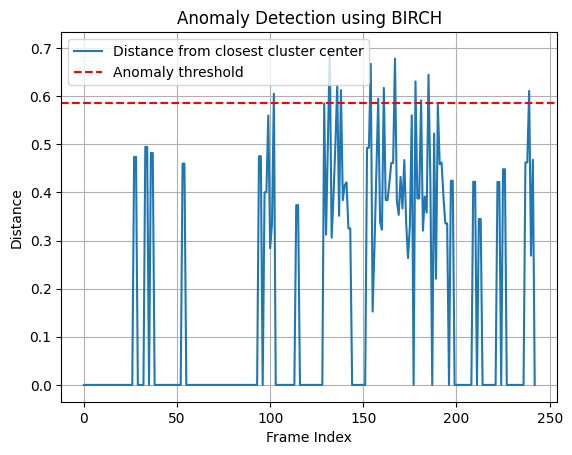

In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt


video_path = "/content/Avenue_Dataset/Avenue Dataset/testing_videos/02.avi"
frame_folder = "/content/frames_birch"
os.makedirs(frame_folder, exist_ok=True)


cap = cv2.VideoCapture(video_path)
fps = 5
frame_count = 0
extracted = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % int(cap.get(cv2.CAP_PROP_FPS) / fps) == 0:
        frame = cv2.resize(frame, (64, 64))
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(f"{frame_folder}/frame_{extracted:03d}.jpg", gray)
        extracted += 1
    frame_count += 1

cap.release()
print(f"{extracted} frames extracted.")

X = []
for file in sorted(os.listdir(frame_folder)):
    img = cv2.imread(os.path.join(frame_folder, file), cv2.IMREAD_GRAYSCALE)
    img = img.astype('float32') / 255.0
    X.append(img.flatten())
X = np.array(X)

pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X)

birch = Birch(n_clusters=3)
birch.fit(X_reduced)

labels = birch.labels_
centers = birch.subcluster_centers_

dists = pairwise_distances(X_reduced, centers)
min_dists = dists.min(axis=1)

threshold = np.percentile(min_dists, 95)
anomalies = np.where(min_dists > threshold)[0]

print("\n------------------------------------------")
print("BIRCH-based Frame-Level Anomaly Detection")
print("------------------------------------------\n")

if len(anomalies) > 0:
    print("Anomalous frames detected at indices:", anomalies)
else:
    print("No anomalies detected.")

plt.plot(min_dists, label="Distance from closest cluster center")
plt.axhline(threshold, color='red', linestyle='--', label="Anomaly threshold")
plt.title("Anomaly Detection using BIRCH")
plt.xlabel("Frame Index")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.show()


In [ ]:



import cv2
import numpy as np
import os
from sklearn.decomposition import PCA

video_path = "/content/Avenue_Dataset/Avenue Dataset/testing_videos/02.avi"
cap = cv2.VideoCapture(video_path)

frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (64, 64))
    frames.append(resized.flatten())
cap.release()

frames_np = np.array(frames)
print(f"{len(frames_np)} frames extracted.")

pca = PCA(n_components=64)
pca_features = pca.fit_transform(frames_np)

import torch
from sklearn.neighbors import kneighbors_graph
from torch_geometric.data import Data

x = torch.tensor(pca_features, dtype=torch.float)
A = kneighbors_graph(pca_features, n_neighbors=5, mode='connectivity', include_self=False)
rows, cols = A.nonzero()
edge_index = torch.tensor(np.vstack((rows, cols)), dtype=torch.long)


data = Data(x=x, edge_index=edge_index)

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCNAnomaly(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(GCNAnomaly, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

model = GCNAnomaly(in_channels=x.shape[1], hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(data)
    loss = torch.mean(out**2)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

model.eval()
with torch.no_grad():
    scores = model(data).squeeze().numpy()

anomaly_indices_gnn = scores.argsort()[-15:][::-1]
print("\n------------------------------------------")
print("GNN-based Frame-Level Anomaly Detection")
print("------------------------------------------")
print(f"Anomalous frames detected at indices: {anomaly_indices_gnn}")


1211 frames extracted.
Epoch 0: Loss = 6818.3662
Epoch 10: Loss = 512.7553
Epoch 20: Loss = 198.3013
Epoch 30: Loss = 63.9518
Epoch 40: Loss = 36.7578
Epoch 50: Loss = 16.3105
Epoch 60: Loss = 10.3611
Epoch 70: Loss = 7.0543
Epoch 80: Loss = 5.4121
Epoch 90: Loss = 4.3866

------------------------------------------
GNN-based Frame-Level Anomaly Detection
------------------------------------------
Anomalous frames detected at indices: [ 938  937   39 1089  337  939   38  345  827  734  396  320  257 1056
 1165]


In [ ]:

import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from torchvision import models, transforms
from tqdm import tqdm

def extract_frames(video_path, resize=(64, 64)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, resize)
        frames.append(frame)
    cap.release()
    print(f"{len(frames)} frames extracted.")
    return np.array(frames)
class CNNFeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        model = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(model.children())[:-1])
        for param in self.features.parameters():
            param.requires_grad = False

    def forward(self, x):
        return self.features(x).view(x.size(0), -1)
class GATModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GATModel, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=4, concat=True)
        self.gat2 = GATConv(hidden_channels * 4, out_channels, heads=1, concat=False)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = self.gat2(x, edge_index)
        return x

def build_graph(features, threshold=0.85):
    sim = cosine_similarity(features)
    A = (sim > threshold).astype(int)
    np.fill_diagonal(A, 0)
    edge_index = torch.tensor(np.array(A.nonzero()), dtype=torch.long)
    return edge_index

def one_class_loss(embeddings):
    center = embeddings.mean(dim=0)
    return torch.mean(torch.norm(embeddings - center, dim=1))

def run_pipeline(video_path):
    frames = extract_frames(video_path)

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])

    cnn = CNNFeatureExtractor().eval().to("cpu")
    with torch.no_grad():
        features = []
        for frame in tqdm(frames):
            if frame.shape[-1] == 1:
                frame = np.repeat(frame, 3, axis=-1)
            tensor = transform(frame).unsqueeze(0)
            feat = cnn(tensor).cpu().numpy().flatten()
            features.append(feat)
    features = np.array(features)

    scaler = StandardScaler()
    features = scaler.fit_transform(features)
    x = torch.tensor(features, dtype=torch.float)
    edge_index = build_graph(features)

    data = Data(x=x, edge_index=edge_index)
    model = GATModel(in_channels=x.shape[1], hidden_channels=64, out_channels=32)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(100):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        loss = one_class_loss(out)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

    model.eval()
    with torch.no_grad():
        embeddings = model(data)
    center = embeddings.mean(dim=0)
    distances = torch.norm(embeddings - center, dim=1).cpu().numpy()
    threshold = np.mean(distances) + 2 * np.std(distances)
    anomalies = np.where(distances > threshold)[0]

    print("\n------------------------------------------")
    print("Advanced GAT + CNN + One-Class Anomaly Detection")
    print("------------------------------------------")
    print(f"Anomalous frames detected at indices: {anomalies}")

run_pipeline("/content/Avenue_Dataset/Avenue Dataset/testing_videos/02.avi")


1211 frames extracted.


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 41.8MB/s]
100%|██████████| 1211/1211 [02:24<00:00,  8.40it/s]


Epoch 0: Loss = 6.1298
Epoch 10: Loss = 3.0335
Epoch 20: Loss = 1.9274
Epoch 30: Loss = 1.0313
Epoch 40: Loss = 0.9384
Epoch 50: Loss = 0.6498
Epoch 60: Loss = 0.6013
Epoch 70: Loss = 0.3915
Epoch 80: Loss = 0.3308
Epoch 90: Loss = 0.3048

------------------------------------------
Advanced GAT + CNN + One-Class Anomaly Detection
------------------------------------------
Anomalous frames detected at indices: [  49   71   75  313  317  318  336  435  437  438  439  441  442  443
  446  448  449  525  526  527  597  792  852  876  877  878  879  880
  881  882  883  985 1104]
